# EDA and Feature Engineering 
# Cleaning and preparing the data for model training

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [142]:
#import dataset
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [143]:
##import test data
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [144]:
##merge both train and test dataset
df=pd.concat([df_test,df_train])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


here we have merged two different datasets to get solve the further requirements. 
pd.concat is used to merge two different datasets 
we can even use append but it is an older version and will soon be eliminated

In [145]:
##basic
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [146]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [147]:
df.drop(['User_ID'],axis=1,inplace=True)

Drop feature is used to drop a particular column/row from the dataset
just choose a particular row to eliminate and remove those rows from it.

axis= 0 for removing row, axis=1 for removing column

inplace=True this means it will remove the row or columns and then update the table

In [148]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


In [149]:
##setting up categorical features
pd.get_dummies(df['Gender'],drop_first=1)

,M
0,1
1,1
2,0
3,0
4,0
...,...
550063,1
550064,0
550065,0
550066,0


pd.get_dummies this is used for the categorical variables where M:1 and F:0 
they are converted.
But the problem here is that we have to add this column in the dataset table and then remove the Gender column which is time consuming.

In [150]:
## handling of categorical feature for Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,26-35,1,C,1,0,4,5.0,12.0,NaN


map() function is used to change and replace the values of row/column within the given table 

In [151]:
## Handle categorical feature Age
df['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [152]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [153]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,5,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,3,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,4,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,4,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,3,1,C,1,0,4,5.0,12.0,NaN


In [154]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
  
df['Age'].unique()

array([4, 2, 3, 1, 5, 6, 0], dtype=int64)

In [155]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,4,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,2,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,3,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,3,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,2,1,C,1,0,4,5.0,12.0,NaN


In [156]:
## fixing categorical City_category
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [157]:
df_city.head()

,B,C
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [158]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,B,2,1,1,11.0,NaN,NaN,1,0
1,P00113442,1,2,17,C,0,0,3,5.0,NaN,NaN,0,1
2,P00288442,0,3,1,B,4+,1,5,14.0,NaN,NaN,1,0
3,P00145342,0,3,1,B,4+,1,4,9.0,NaN,NaN,1,0
4,P00053842,0,2,1,C,1,0,4,5.0,12.0,NaN,0,1


We have taken a categorical variable for the city_category and we have to combine this with the above dataset.
we can then completely remove the city column from the dataset.

In [159]:
df.drop('City_Category',axis=1,inplace=True)

In [160]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,2,1,1,11.0,NaN,NaN,1,0
1,P00113442,1,2,17,0,0,3,5.0,NaN,NaN,0,1
2,P00288442,0,3,1,4+,1,5,14.0,NaN,NaN,1,0
3,P00145342,0,3,1,4+,1,4,9.0,NaN,NaN,1,0
4,P00053842,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [161]:
## Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [162]:
## focus on replacing missing values 
df['Product_Category_2'].unique()

array([11.,  5., 14.,  9.,  3.,  4., 13.,  2., nan,  8., 15., 17., 12.,
       16.,  6., 10., 18.,  7.])

In [163]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

here we see these are DISCRETE values and several values are occuring 
there are NAN values present in this and the best way to remove them is by using MODE 

In [164]:
df['Product_Category_2'].mode()[0]

8.0

In [165]:
## Replace the missing value with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [166]:
df['Product_Category_2'].isnull().sum()

0

In [167]:
## Product cat 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 12., 15.,  9., 16., 14.,  4.,  3.,  5.,  8., 17., 13., 11.,
       10.,  6., 18.])

In [168]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [169]:
df['Product_Category_3'].mode()[0]

16.0

In [170]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [171]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,2,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,3,1,4+,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,3,1,4+,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [172]:
df.shape

(783667, 12)

In [173]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [174]:
df.replace(to_replace="4+",value="4")

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,2,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,3,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,3,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,2,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5,13,1,1,20,8.0,16.0,368.0,1,0
550064,P00375436,0,2,1,3,0,20,8.0,16.0,371.0,0,1
550065,P00375436,0,2,15,4,1,20,8.0,16.0,137.0,1,0
550066,P00375436,0,6,1,2,0,20,8.0,16.0,365.0,0,1


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


here, Stay in current city is given as 'object' whereas it is in the form of integers in the table. So we have to convert objects into integers

In [176]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

ValueError: invalid literal for int() with base 10: '4+'

In [177]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 71.7+ MB


C:\Users\prana\anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

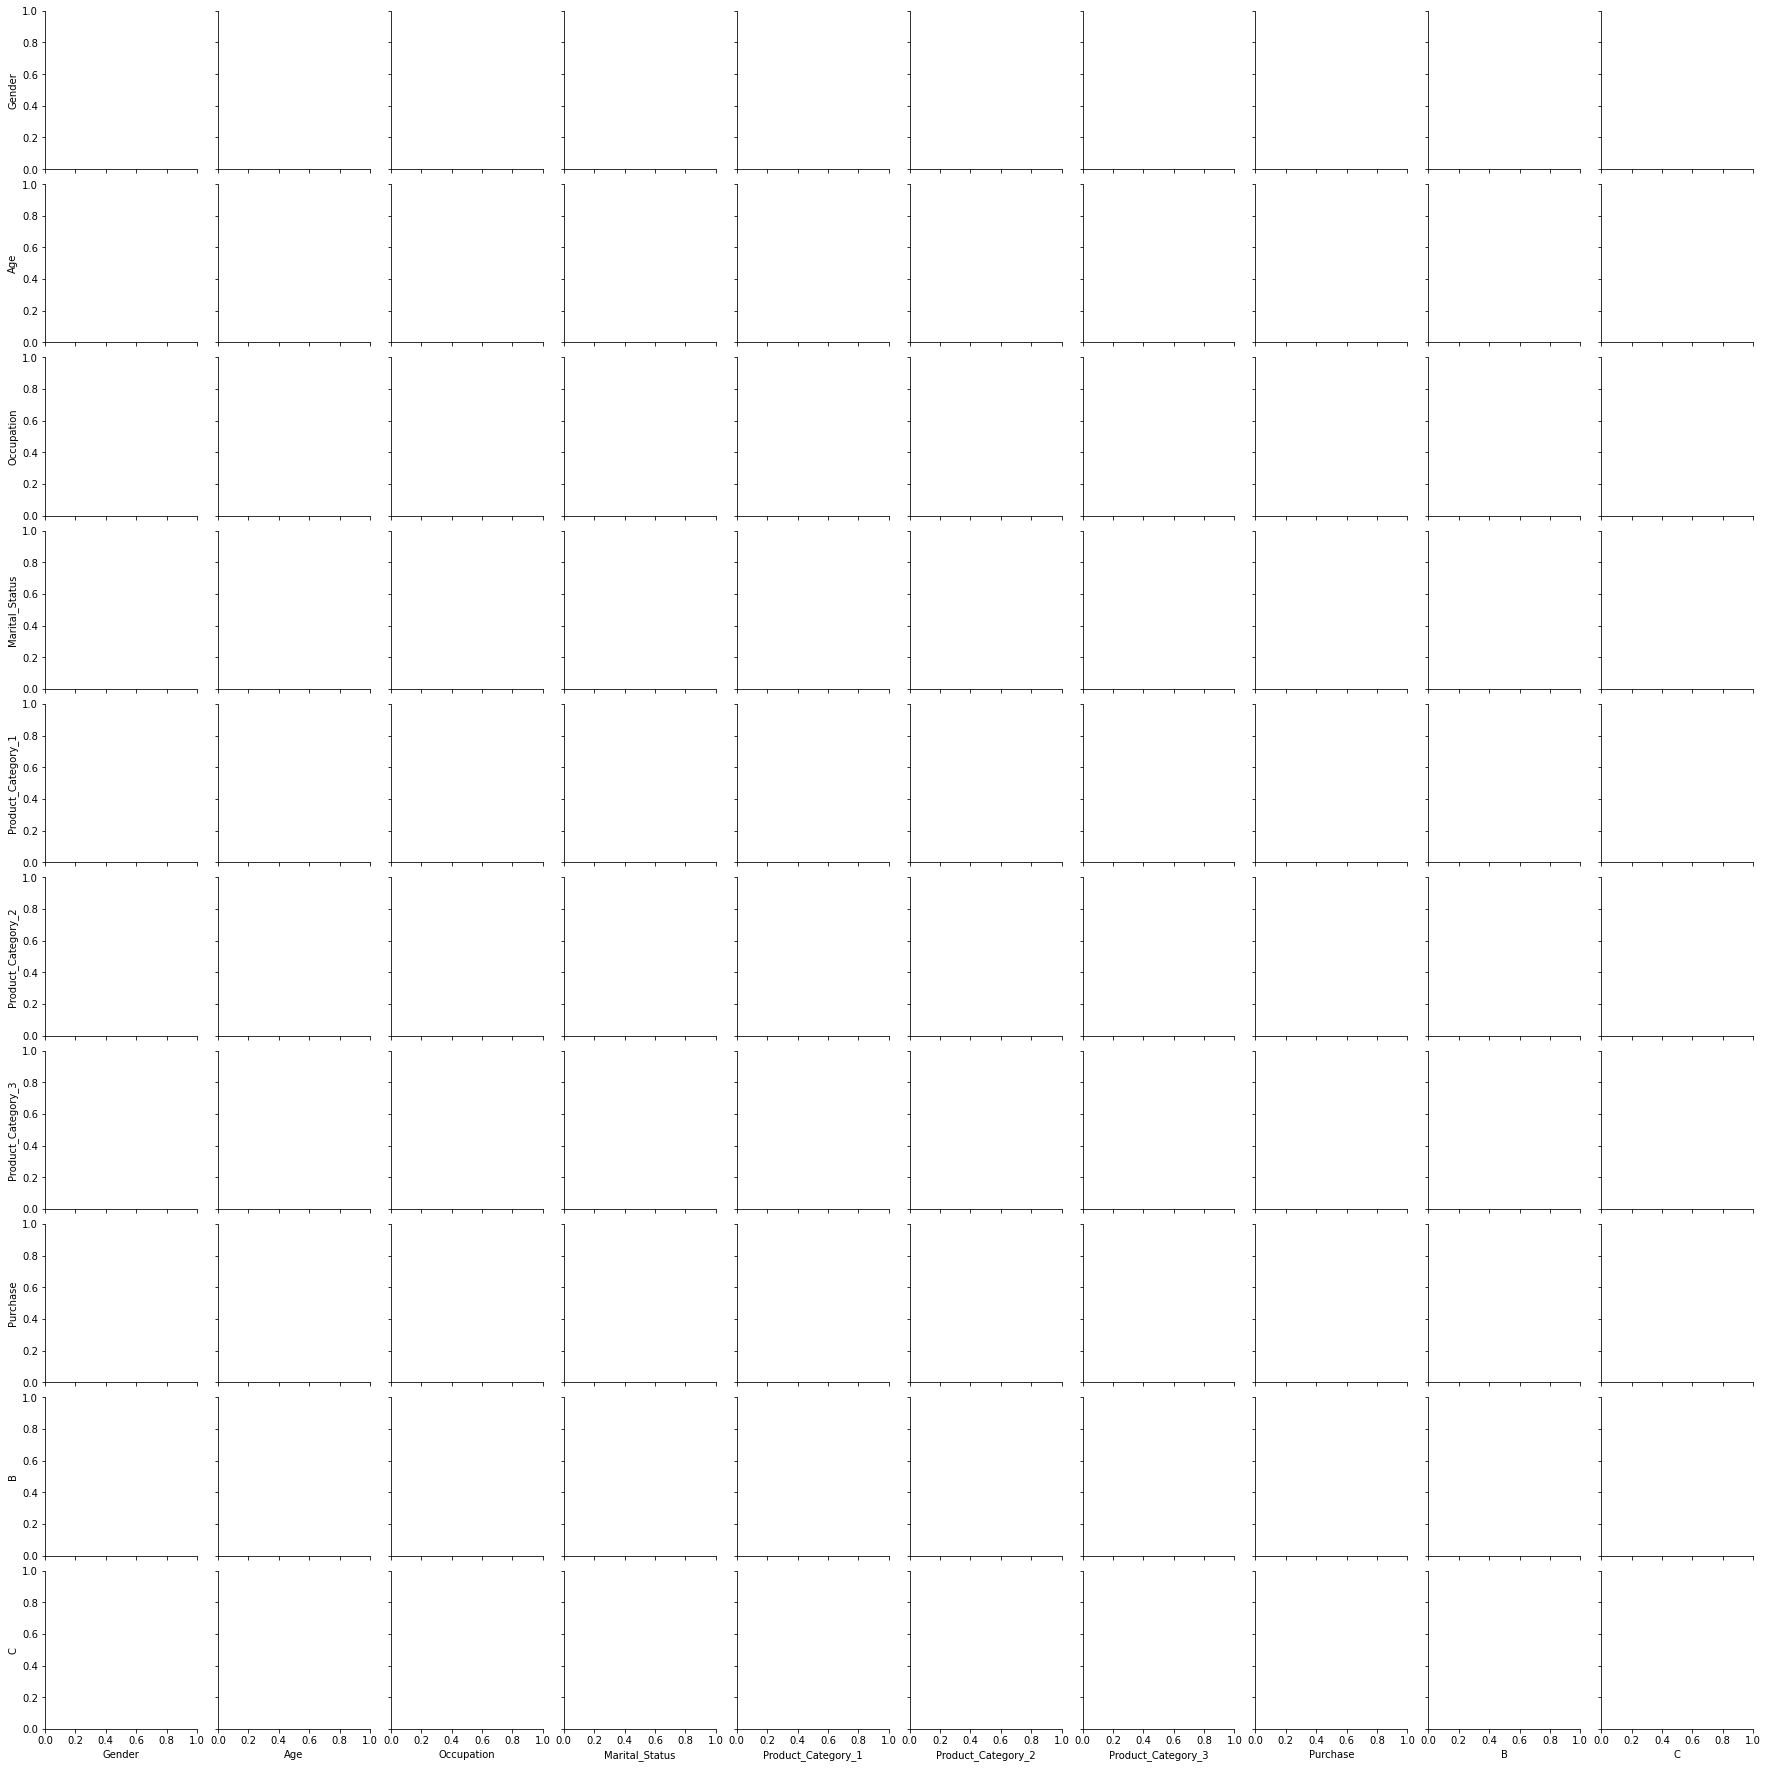

In [179]:
## visualisation
sns.pairplot(df)

C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

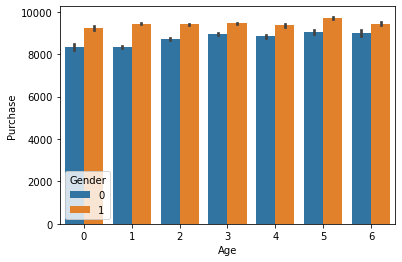

In [180]:
## visualition of Age vs Purchase
sns.barplot('Age','Purchase',hue='Gender',data=df)

C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

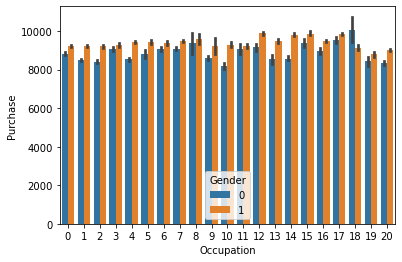

In [181]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

In [182]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,2,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,3,1,4+,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,3,1,4+,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [183]:
df.drop(['Product_ID'],axis=1,inplace=True)

In [184]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,4,7,2,1,1,11.0,16.0,NaN,1,0
1,1,2,17,0,0,3,5.0,16.0,NaN,0,1
2,0,3,1,4+,1,5,14.0,16.0,NaN,1,0
3,0,3,1,4+,1,4,9.0,16.0,NaN,1,0
4,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [185]:
df_test=df[df['Purchase'].isnull()]

In [186]:
df_train=df[~df['Purchase'].isnull()]

In [187]:
X=df_train.drop('Purchase',axis=1)

In [188]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,0,10,2,0,3,8.0,16.0,0,0
1,0,0,10,2,0,1,6.0,14.0,0,0
2,0,0,10,2,0,12,8.0,16.0,0,0
3,0,0,10,2,0,12,14.0,16.0,0,0
4,1,6,16,4+,0,8,8.0,16.0,0,1


In [189]:
X.shape

(550068, 10)

In [190]:
y=df_train['Purchase']

In [191]:
y.shape

(550068,)

In [192]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [193]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [194]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

KeyError: "['Product_ID'] not found in axis"

In [ ]:
## Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScalar()
sc.fit_transform(X_train)
X_test=sc.transform(X_test)